# Introduction to data visualization -- Matplotlib and Seaborn

## Author:  [Dr. Rahul Remanan](https://www.linkedin.com/in/rahulremanan)
### CEO and Chief Imagination Officer, [Moad Computer](https://www.moad.computer)

Matplotlib is a widely used python library for data visualization. It is a constantly evolving library that consist of many useful graphing functions. It has recently added the plt.style tools for added customization of Matplotlib configurations and style sheets. It has also started handling data from a commonly used datascience library Pandas more seamlessly. The Matplotlib updated 2.0 API  will include a new default stylesheet that will improve on the current status quo. 

Seaborn is another visulization library built on top of Matplotlib. The goal of Seaborn is to augment the functionality of Matplotlib. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.Seaborn is an extremely useful addon for visualizing data.

This notebook discusses the basics of data visualization using Matplotlib and Seaborn.

## Part 01 -- Visualizing random walk dataset

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

### Create a random walk dataset

In [0]:
import random
import sys

In [3]:
rnd = random.SystemRandom(5)
rnd_seed = rnd.randint(0, 4294967295)
print ("Random number seed used to generate the data: {}".format(rnd_seed))
rng = np.random.RandomState(rnd_seed)
x = np.linspace(0, 10, 1500)
y = np.cumsum(rng.randn(1500, 6), 0)

Random number seed used to generate the data: 940662103


### Generating a plot of the random walk data with Matplotlib defaults

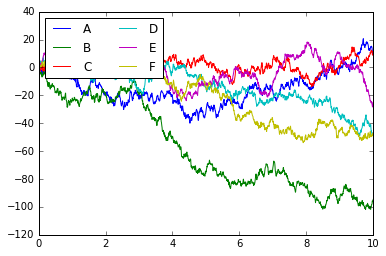

In [4]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Using Seaborn to generate a more visually appealing graphing function


In [0]:
import seaborn as sns
sns.set()

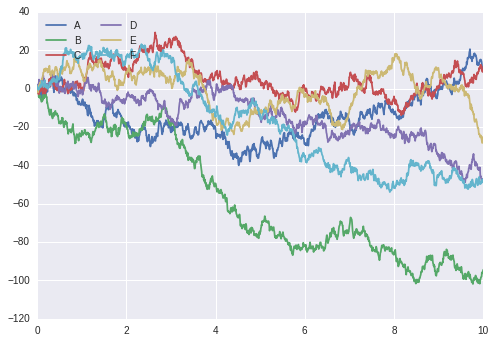

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Using Pandas to generate time series

By integrating the Pandas API called [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), a time series plot can be created.

In this example dataset, we will create a time series data starting from 1/1/2010 with 1500 data-points.

Using np.zeros, the x axis will be filled with just 1500 zeros, since we will be inherinting the x values from the previous example, using Matplotlib.

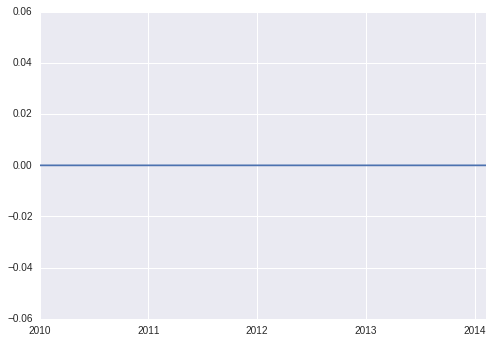

In [7]:
import pandas as pd
import numpy as np

x = np.zeros(1500)
xt = pd.date_range('1/1/2010', periods=1500)

ts = pd.Series(x, index=xt)
ts = ts.cumsum()
ts.plot()

### Attaching time-series axes to a Seaborn plot

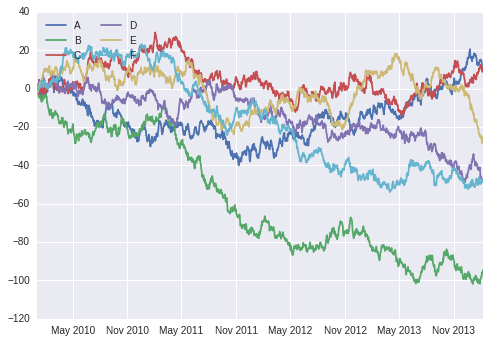

In [8]:
plt.plot(xt, y)
plt.legend('{}{}{}{}{}{}'.format('A', 'B', 'C', 'D', 'E', 'F'), ncol=2, loc='upper left');

### Histograms, KDE, and densities
In statistical data visualization, plotting histograms and joint distributions of variables are an essential task. Using the standard Matplotlib API, these plots can be generated extremely straightforward.

[The data is generated using Numpy's random.multivariate_normal API](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.multivariate_normal.html). This will draw random samples from a multivariate normal distribution. The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

Two statistical properties used to generate this random dataset are: [mean](https://en.wikipedia.org/wiki/Mean) and [covariance](https://en.wikipedia.org/wiki/Covariance). 

In probability and statistics, the population mean, or expected value, are a measure of the central tendency either of a probability distribution or of the random variable characterized by that distribution. The mean is a coordinate in N-dimensional space, which represents the location where samples are most likely to be generated. This is analogous to the peak of the bell curve for the one-dimensional or univariate normal distribution.

Covariance is a measure of the joint variability of two random variables. It indicates the level to which two variables vary together. From the multivariate normal distribution, we draw N-dimensional samples, X = [x_1, x_2, ... x_N]. The covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i (i.e. its “spread”).

Instead of specifying the full covariance matrix, popular approximations include:

* Spherical covariance (cov is a multiple of the identity matrix)
* Diagonal covariance (cov has non-negative elements, and only on the diagonal)

This geometrical property can be seen in two dimensions by plotting generated data-points.

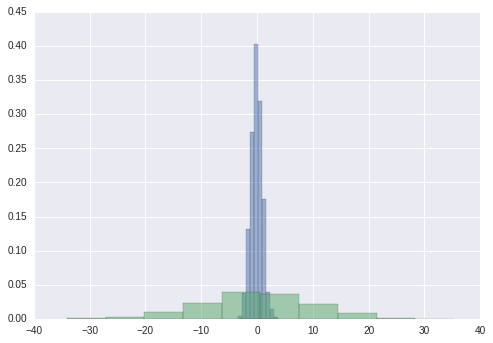

In [9]:
mean = [0, 0]
cov = [[1, 0], [0, 100]] 

data = np.random.multivariate_normal(mean, 
                                     cov, 
                                     size=2500)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

### Kernel Density Estimation plot

 [Kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation) is a non-parametric way of estimating the probability density function of a random variable. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Instead of generating a histogram, using the sns.kdeplot function in Seaborn, we can get a smooth estimate of the distribution using a kernel density estimation.

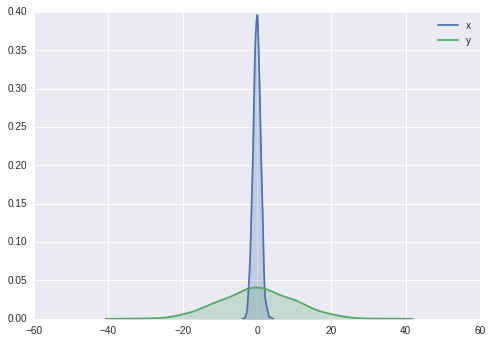

In [10]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

### Combined Histogram, KDE plot

Using the [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) function both the histogram plots and the KDE plots can be combined into a single graph. This overlay helps produce a better visual summary of a given dataset.

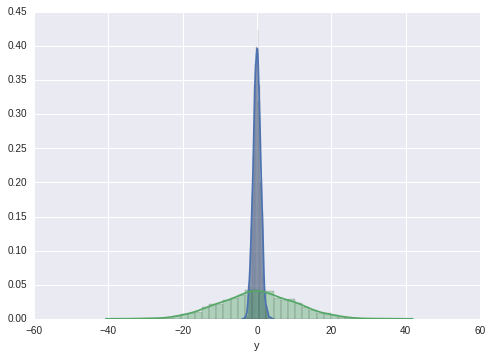

In [11]:
sns.distplot(data['x'])
sns.distplot(data['y']);

### Visualizing two-dimensional data

Using [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html), a two dimensional dataset can be easily visualized.

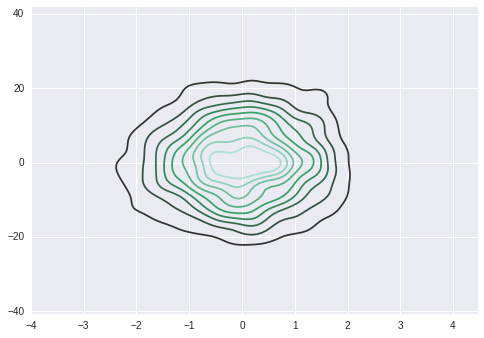

In [12]:
sns.kdeplot(data);

### Joint distribution and marginal distribution

The joint distribution and the marginal distributions can be plotted together using the [sns.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) function in Seaborn.

The plotting will be done against a dark background to improve the readability of the graphs.

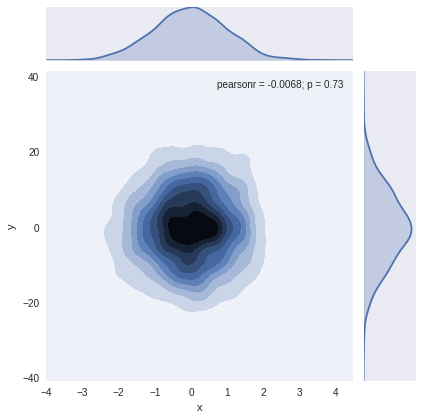

In [13]:
with sns.axes_style('dark'):
    sns.jointplot("x", "y", data, kind='kde');

### Adding regression and kernel density fits

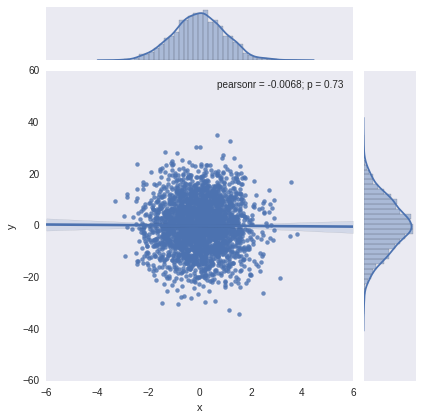

In [14]:
with sns.axes_style('dark'):
    sns.jointplot("x", "y", data, kind='reg');

### Generating a joint histogram plot using hexagonal bins

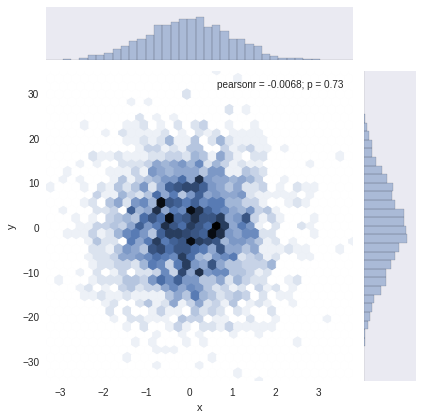

In [15]:
with sns.axes_style('dark'):
    sns.jointplot("x", "y", data, kind='hex');

### Aligning the marginal Axes tightly with the joint Axes

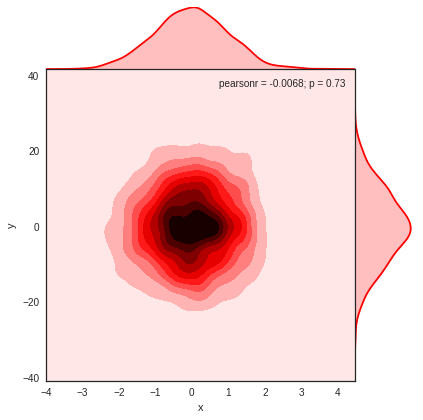

In [16]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, space = 0, kind='kde', color="r");

## Part 02 -- Visualizing pairwise correlations with matrix plots

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sns.set(style="dark")

#### Create a random dataset

In [0]:
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

#### Compute the correlation matrix

In [0]:
corr = d.corr()

#### Generate a mask for the upper triangle



In [0]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#### Generate a custom diverging colormap

In [0]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#### Draw the heatmap with the mask and correct aspect ratio

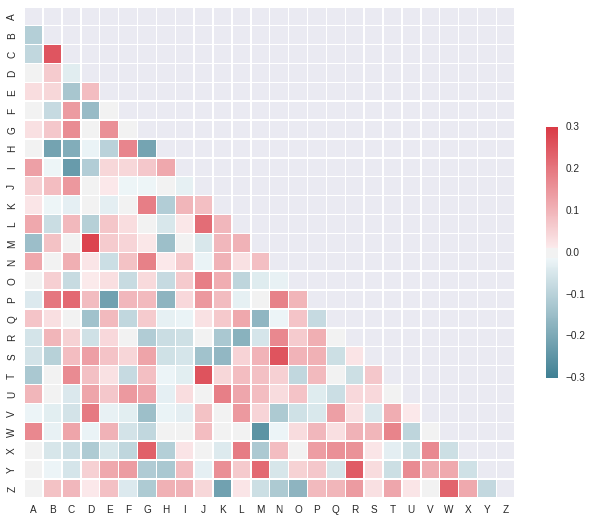

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Part 03 -- Visualizing high dimensional datasets


### Pair plots using Seaborn

Using Seaborn's [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html), pairwise relationships in a dataset can be summarized.

In [0]:
import seaborn as sns

In [25]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


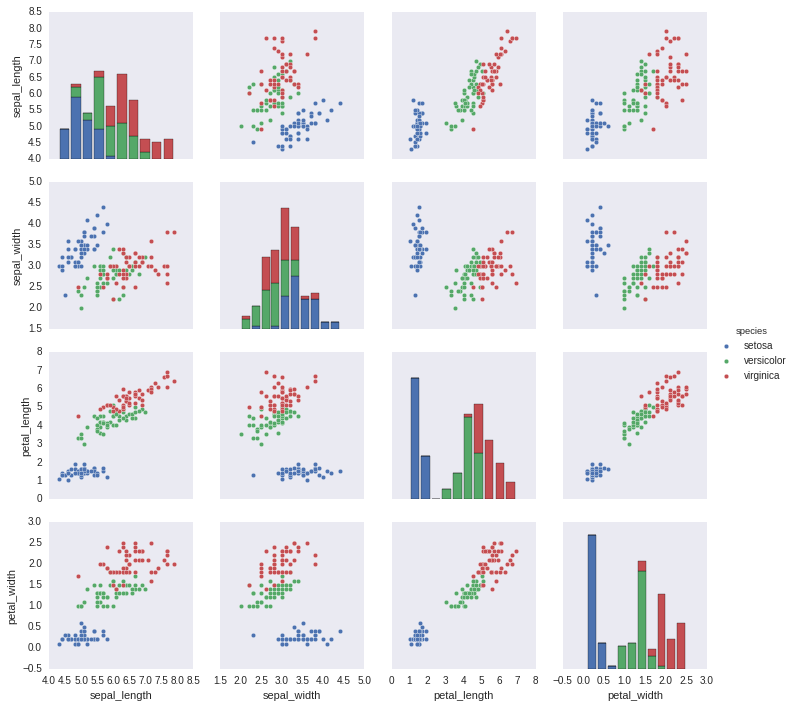

In [26]:
sns.pairplot(iris, hue='species', size=2.5);

### Applying a different color palette

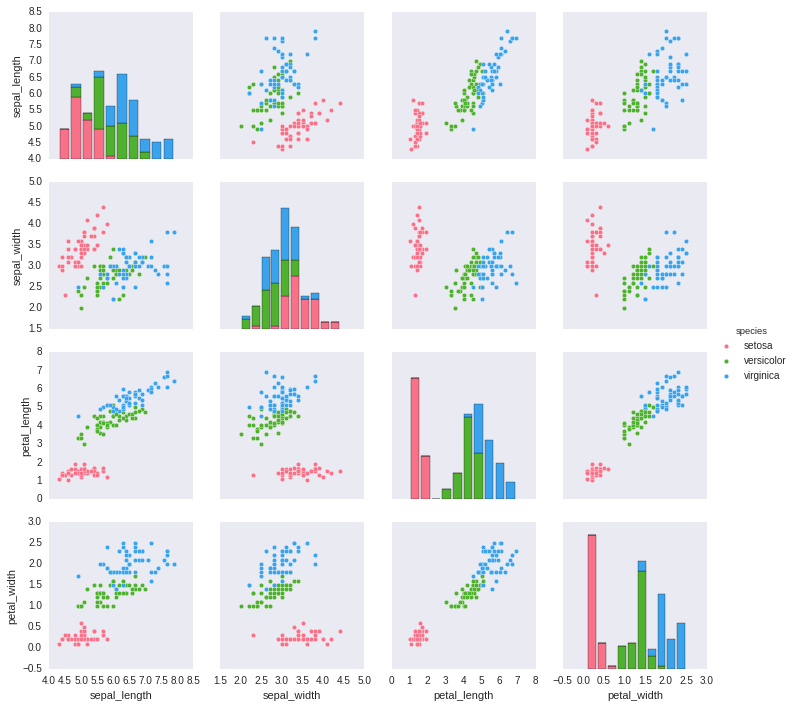

In [27]:
g = sns.pairplot(iris, hue="species", palette="husl")

### Applying different markers for each level of the hue variable

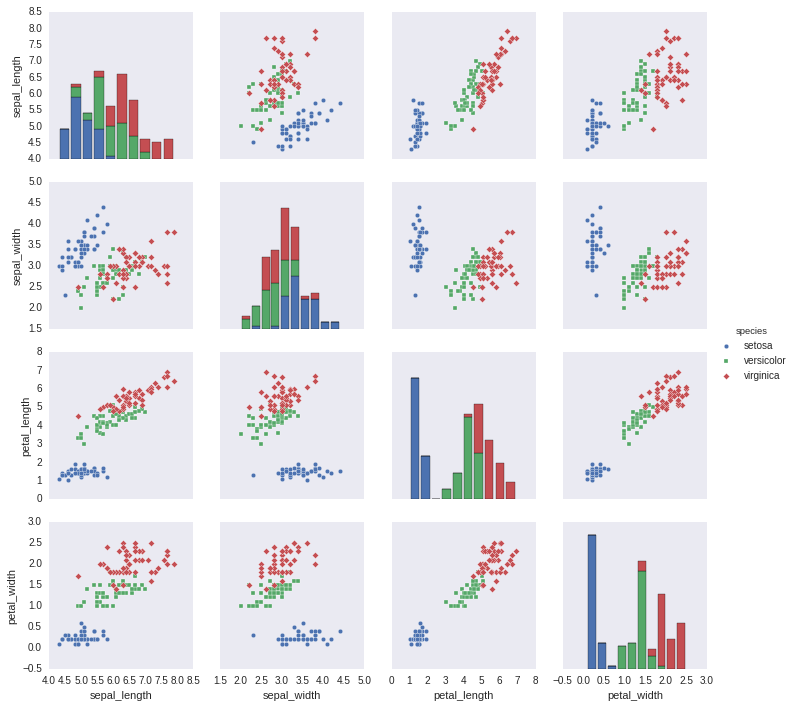

In [28]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

### Generating summary plots for only a subset of variables

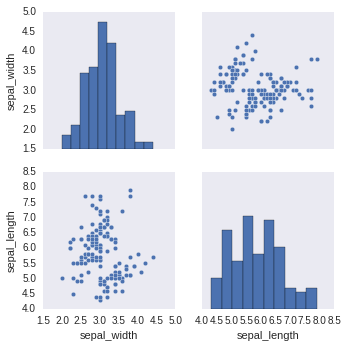

In [29]:
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

###Changing the size of the plots

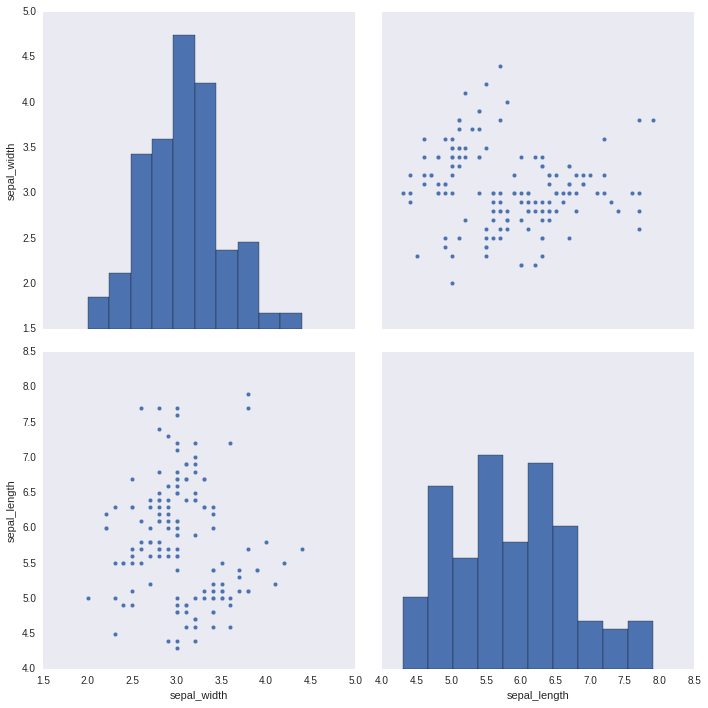

In [30]:
g = sns.pairplot(iris, size=5,
                 vars=["sepal_width", "sepal_length"])

### Assign different variables to rows and columns in a graph

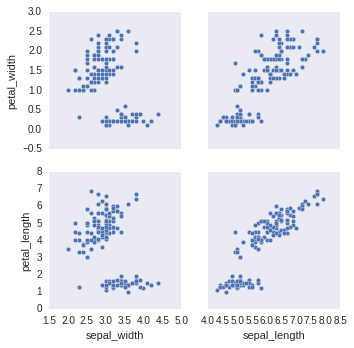

In [31]:
g = sns.pairplot(iris,
                  x_vars=["sepal_width", "sepal_length"],
                  y_vars=["petal_width", "petal_length"])

### Univariate plots using kernel density estimate (KDE)

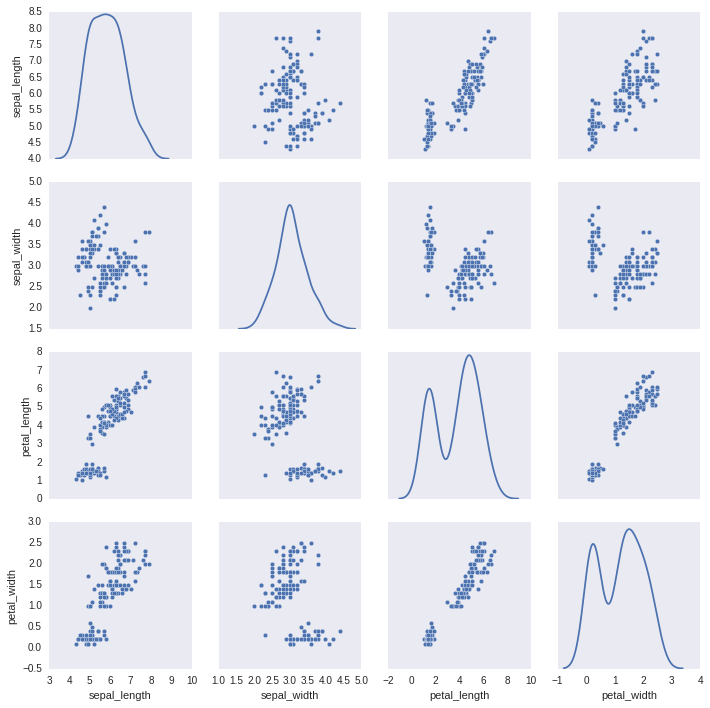

In [32]:
g = sns.pairplot(iris, diag_kind="kde")

### Adding linear regression fit lines to scatter plots

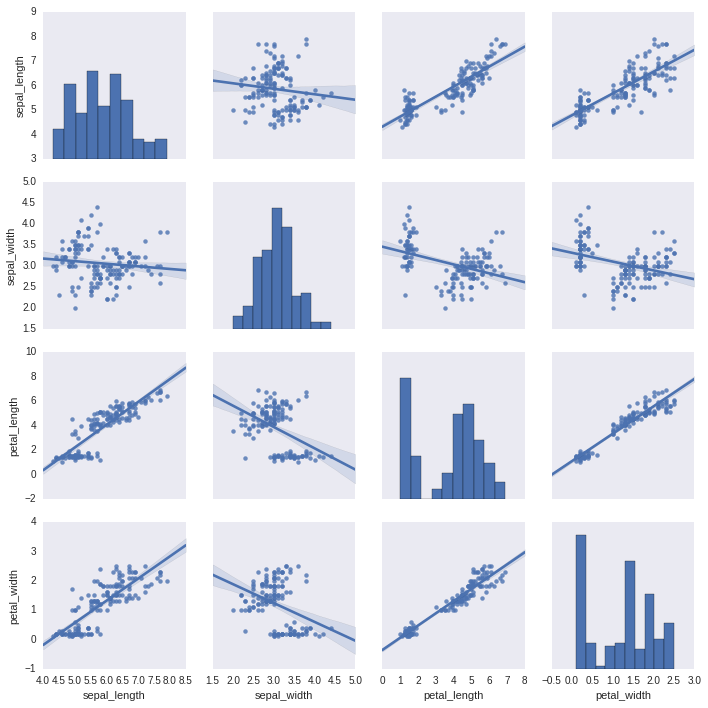

In [33]:
g = sns.pairplot(iris, kind="reg")

### Passing keyword arguments to the underlying function

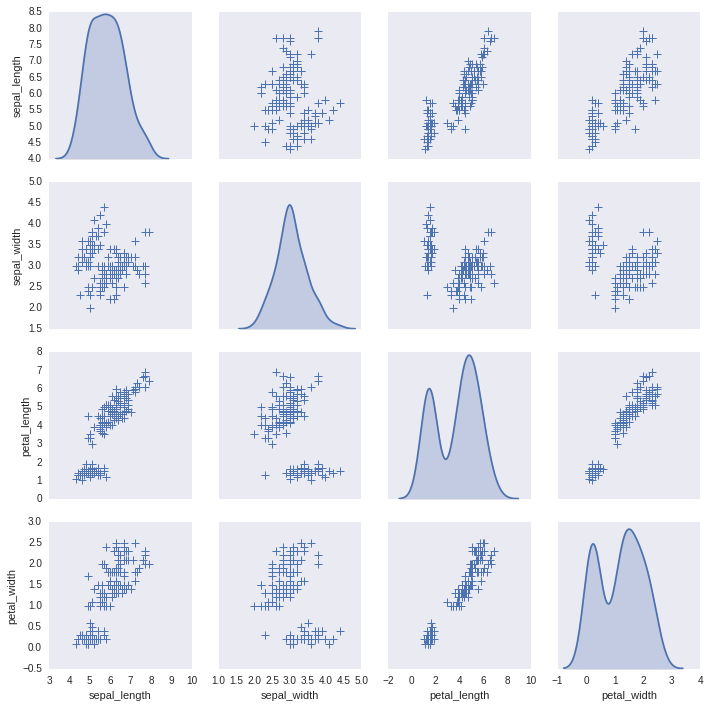

In [34]:
g = sns.pairplot(iris, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

### Generating faceted histograms

Using Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) faceted histogram plots can be generated very easily.

In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


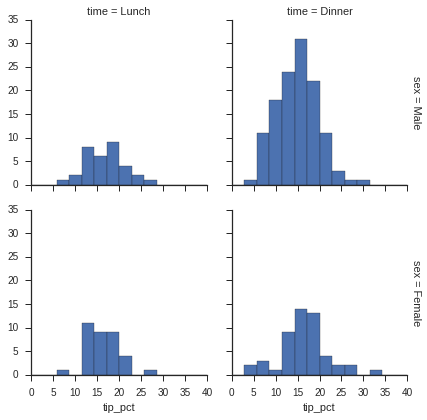

In [36]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


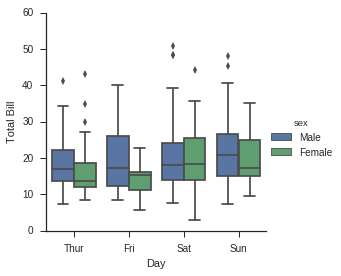

In [37]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distribution plot
Plot to display joint distribution of different datasets, along with the associated marginal distributions.

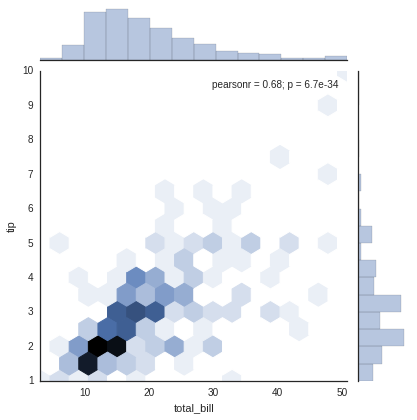

In [38]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

### Joint distribution plot with automatic kernel density estimation and regression

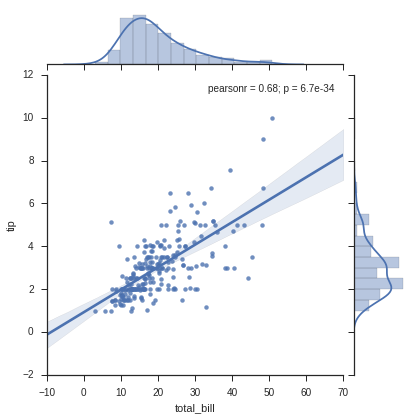

In [39]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series plot can be generated using [sns.factorplot](https://seaborn.pydata.org/generated/seaborn.catplot.html).

In [0]:
import seaborn as sns
try:
  from seaborn import catplot as factorplot
except:
  from seaborn import factorplot as factorplot

In [41]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


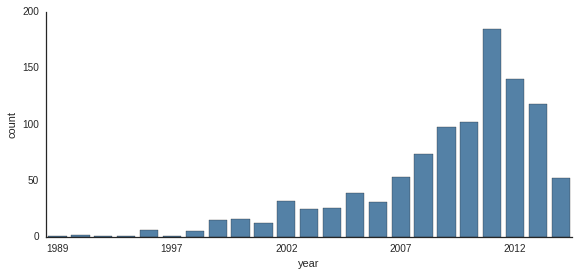

In [42]:
with sns.axes_style('white'):
    g = factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


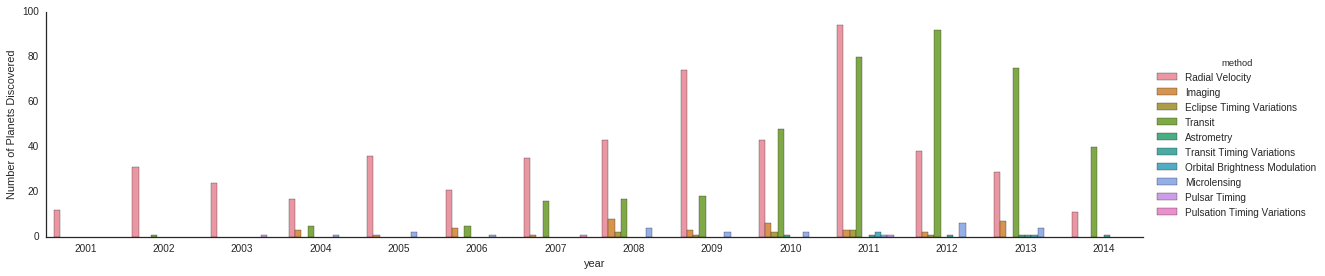

In [43]:
with sns.axes_style('white'):
    g = factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### Categorical plots

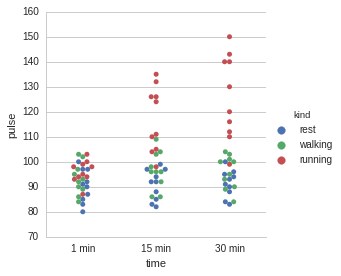

In [44]:
import seaborn as sns
sns.set(style="whitegrid")
exercise = sns.load_dataset("exercise")
g = factorplot(x="time", y="pulse", hue="kind", data=exercise, kind="swarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


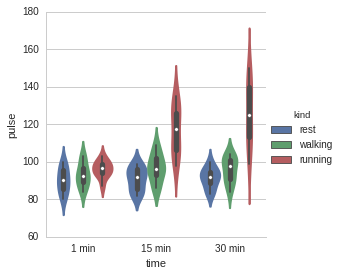

In [45]:
g = factorplot(x="time", y="pulse", hue="kind",
                   data=exercise, kind="violin")

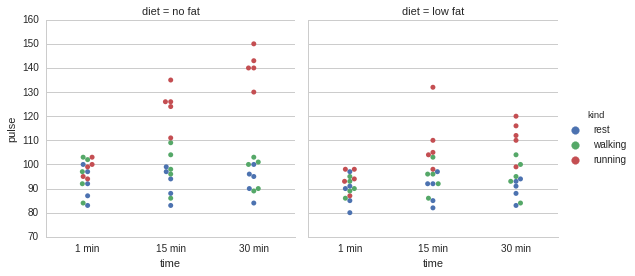

In [46]:
g = factorplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise, kind="swarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


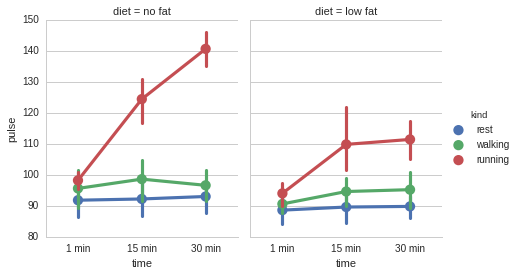

In [47]:
g = factorplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=.8)

### Wrap many column facets into rows

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


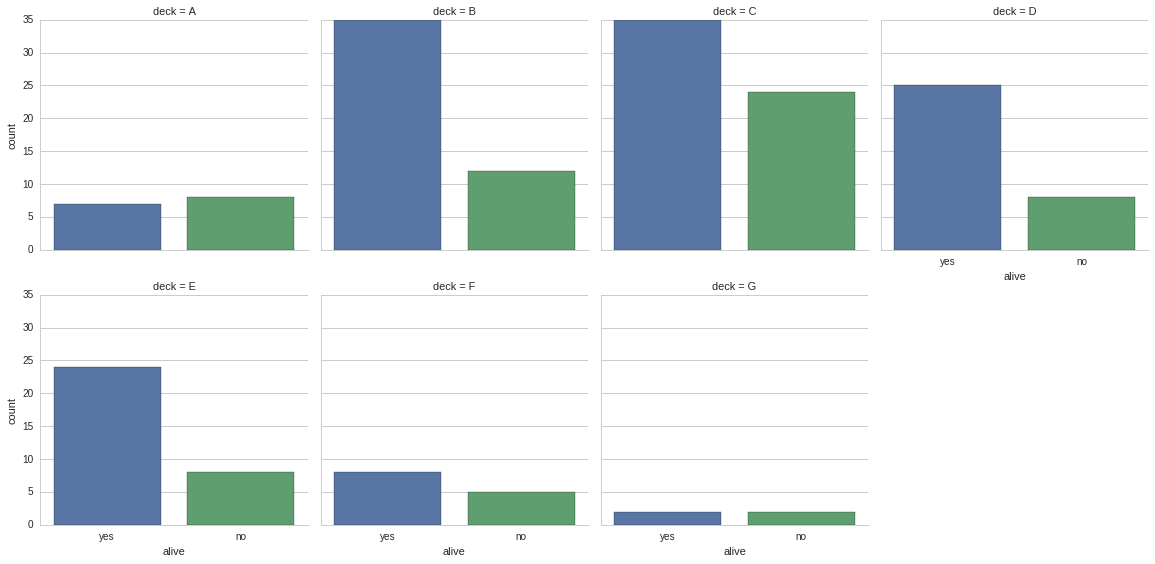

In [48]:
titanic = sns.load_dataset("titanic")
g = factorplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count")

### Generate a horizontal plot and pass other keyword arguments to the plotting function

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


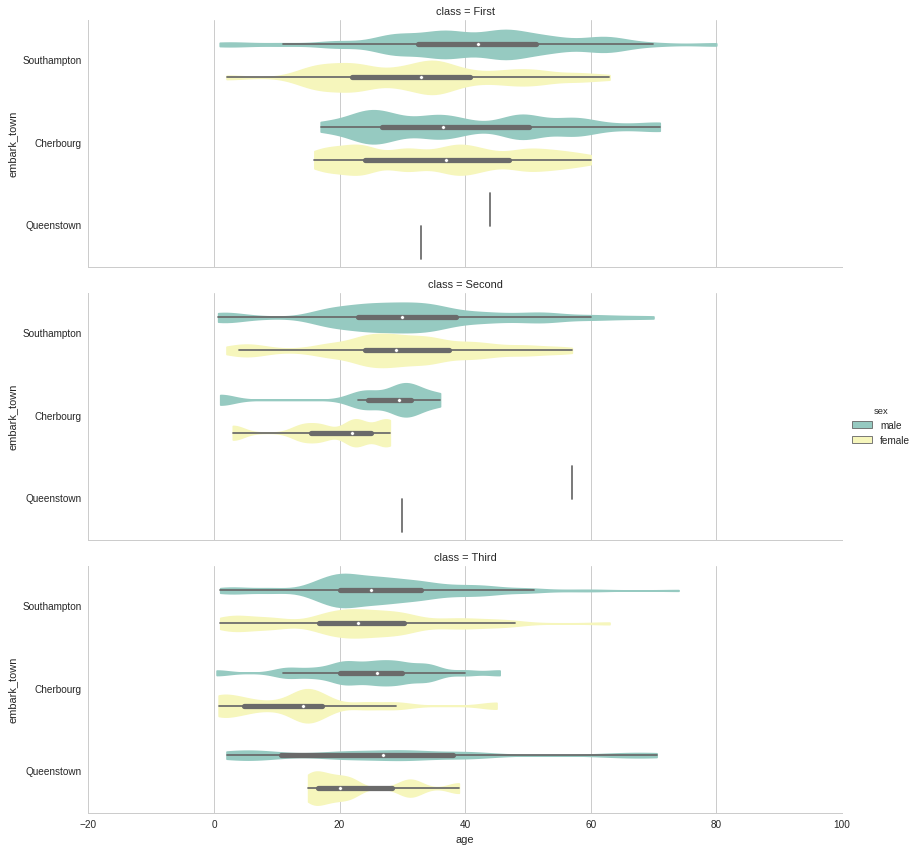

In [49]:
g = factorplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

### Tweaking [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


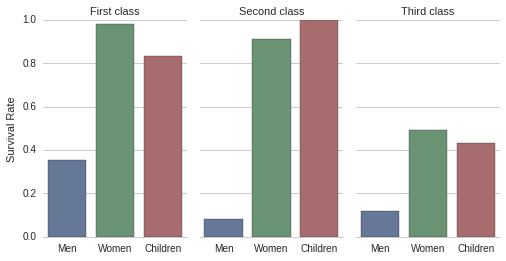

In [50]:
g = factorplot(x="who", y="survived", col="class",
               data=titanic, saturation=.5,
               kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

## Part 04 -- [Scatter plot masks](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py)

This section of the notebook shows how to create masks for scatter plot.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

#### Fixing random state for reproducibility

In [0]:
np.random.seed(19680801)

In [0]:
N = 100

r0 = 0.6

x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)

area = (20 * np.random.rand(N))**2  # 0 to 10 point radii

c = np.sqrt(area)

r = np.sqrt(x * x + y * y)

area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)

cmap1 = plt.cm.get_cmap("Accent")
cmap2 = plt.cm.get_cmap("Accent_r")

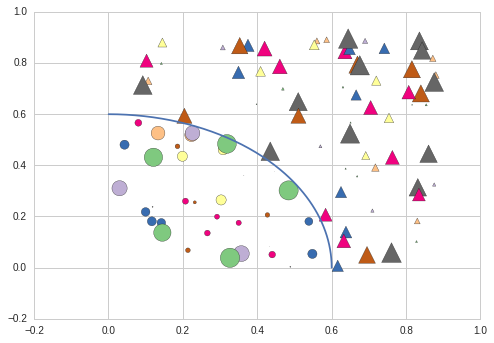

In [54]:
plt.scatter(x, y, s=area1, marker='^', c=c, cmap=cmap1)
plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cmap2)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

## Part 05 -- [Creating filled contour plots](https://matplotlib.org/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py)

Using matplotlib  [axes.Axes.contourf](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html#matplotlib.axes.Axes.contourf) method, a filled contour plot can be generated.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

In [0]:
# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked

In [0]:
Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = np.ma.masked

In [0]:
# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

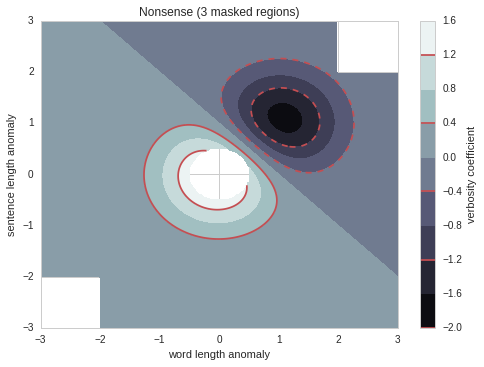

In [60]:
# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

fig1, ax2 = plt.subplots()
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

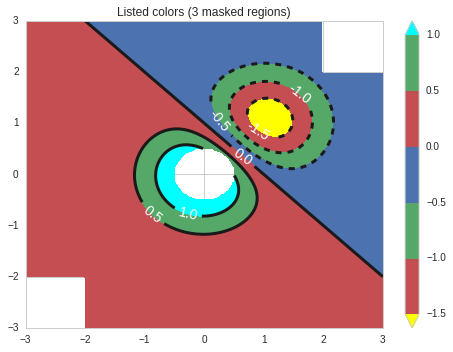

In [61]:
fig2, ax2 = plt.subplots()
# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = ax2.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = ax2.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
ax2.set_title('Listed colors (3 masked regions)')
ax2.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
fig2.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

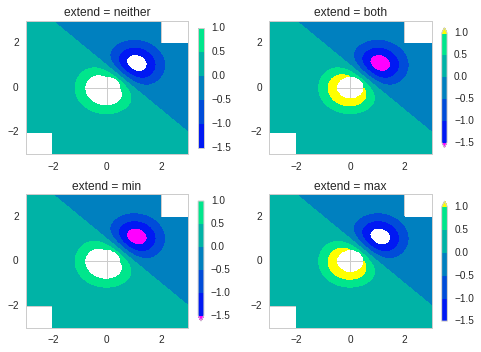

In [62]:
fig3, axs = plt.subplots(2, 2)
fig3.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig3.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

## Part 06 -- [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. 

Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. 

The purpose of the article was the illustrate the point that "numerical calculations are exact, but graphs are rough". 

Anscombe's quartet is therefore a great example to illustrate the importance of creating visual summaries of data.

In a 1973 paper, Graphs in Statistical Analysis, published in The American Statistician, Vol. 27, No. 1. (Feb., 1973), pp. 17-21, Anscombe provided the briefiest of abstracts: **"Graphs are essential to good statistical analysis".**

His paper opened with a brief meditation on the usefulness of graphs:

*Most textbooks on statistical methods, and most statistical computer programs, pay too little attention to graphs. Few of us escape being indoctrinated with these notions:*

*1.   numerical calculations are exact, but graphs are rough;*
*2.   for any particular kind of statistical data there is just one set of calculations constituting a correct statistical analysis;*
*3. performing intricate calculations is virtuous, whereas actually looking at the data is cheating.*

*A computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.*

*Graphs can have various purposes, such as: (i) to help us perceive and appreciate some broad features of the data, (ii) to let us look behind those broad features and see what else is there. Most kinds of statistical calculation rest on assumptions about the behavior of the data. Those assumptions may be false, and then the calculations may be misleading. We ought always to try to check whether the assumptions are reasonably correct; and if they are wrong we ought to be able to perceive in what ways they are wrong. Graphs are very valuable for these purposes.*

*Good statistical analysis is not a purely routine matter, and generally calls for more than one pass through the computer. The analysis should be sensitive both to peculiar features in the given numbers and also to whatever background information is available about the variables. The latter is particularly helpful in suggesting alternative ways of setting up the analysis. Thought and ingenuity devoted to devising good graphs are likely to pay off. Many ideas can be gleaned from the literature...*

To illustrate his point on importance of visualization, Anscombe generatad a set of four simple pairwise datasets (sets I, II, II, IV below with an x and y value each). This dataset was intended to demonstrate the usefulness of looking at graphs, instead of just using numerical calculations to summarize the data.

### Fetching first example dataset for illustrating Anscombe's quartet

In [64]:
! wget https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/AnscombesData.csv

--2018-08-26 03:32:30--  https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/AnscombesData.csv
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/AnscombesData.csv [following]
--2018-08-26 03:32:30--  https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/AnscombesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319 [text/plain]
Saving to: ‘AnscombesData.csv’

AnscombesData.csv   100%[===================>]     319  

### Summarize Anscombe's quartet dataset, first example

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
aq=pd.read_csv('./AnscombesData.csv',header=[0],index_col=[0])
aq

,x1,y1,y2,y3,x2,y4
ObsNum,,,,,,
1,10,8.04,9.14,7.46,8,6.58
2,8,6.95,8.14,6.77,8,5.76
3,13,7.58,8.74,12.74,8,7.71
4,9,8.81,8.77,7.11,8,8.84
5,11,8.33,9.26,7.81,8,8.47
6,14,9.96,8.10,8.84,8,7.04
7,6,7.24,6.13,6.08,8,5.25
8,4,4.26,3.10,5.39,8,5.56
9,12,10.84,9.13,8.15,8,7.91


### Summary statistics

The summary statistics show that the the means were identical for x and y across the groups. The variances were also, all but indistinguishable in any meaningful sense of the term.

In [67]:
aq.mean()

x1    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
x2    9.000000
y4    7.500909
dtype: float64

In [68]:
aq.var()

x1    11.000000
y1     4.127269
y2     4.127629
y3     4.122620
x2    11.000000
y4     4.123249
dtype: float64

### [Generate an overlay scatter plot with regression line](https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python)

This is the step where the data is pre-processed to be create a visual summary.

In this step, we will use the first pair: x1 and y1, create a scatter plot and a regression line, apply masks and colorize the plots using both Matplotlib and Seaborn APIs.


In [0]:
N = len(aq['x1'])
r0 = 11
x = aq['x1']
y = aq['y1']
area = (x * x + y * y)
c = np.sqrt(area)
r = np.sqrt(area)
area1 = np.ma.masked_where(r <= r0, area)+max(area)
area2 = np.ma.masked_where(r > r0, area)+max(area)
cmap1 = plt.cm.get_cmap("Accent")
cmap2 = plt.cm.get_cmap("Accent_r")

In [0]:
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(x, y, 1)


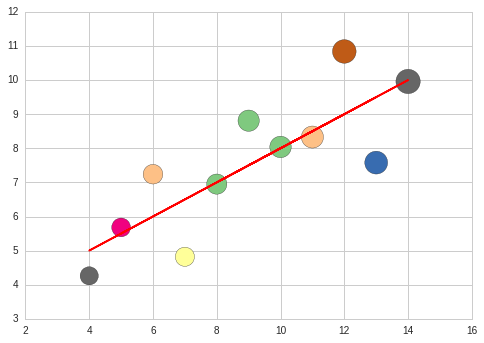

In [71]:
plt.scatter(x, y, s=area1, marker='o', c=c, cmap=cmap1)
plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cmap2)
plt.plot(x, b + m * x, '-', c='red')
sns.set_style("ticks")

### Generate a stacked scatter plot of the Anscombe's quartert

Statistical properties, such as regression lines, were also the same. The stacked scatter plot of all four pairs show the same regression lines.

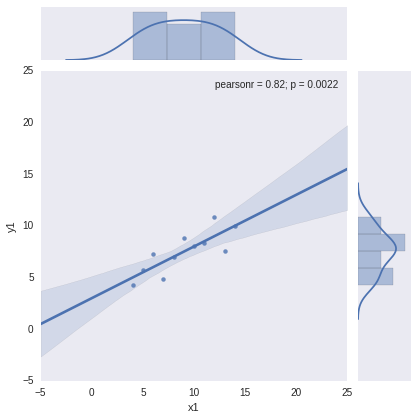

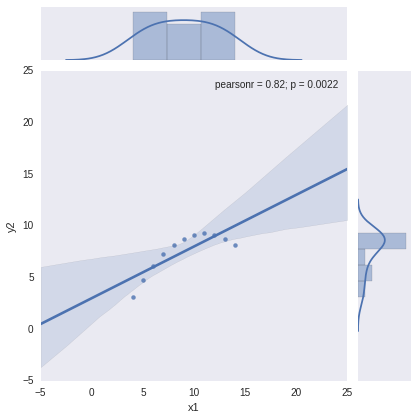

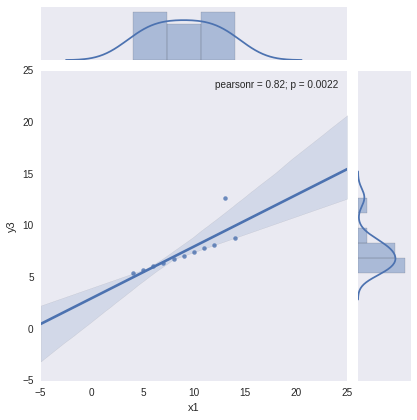

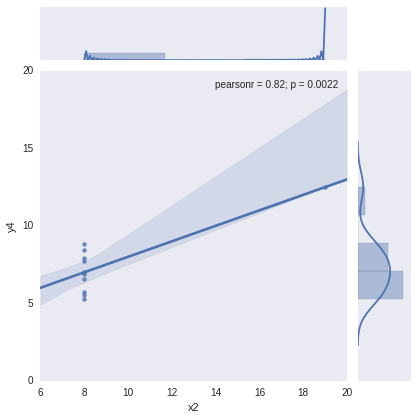

In [72]:
with sns.axes_style('dark'):
    sns.jointplot("x1", "y1", aq, kind='reg');
    sns.jointplot("x1", "y2", aq, kind='reg');
    sns.jointplot("x1", "y3", aq, kind='reg');
    sns.jointplot("x2", "y4", aq, kind='reg');

### Fetching [second example](http://nbviewer.jupyter.org/github/psychemedia/ou-tm351/blob/master/notebooks-RFC/Anscombe's%20Quartet%20%5Bopen%5D.ipynb) dataset for illustrating Anscombe's quartet

In [74]:
! wget https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/AnscombesData_2.csv

--2018-08-26 03:33:27--  https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/AnscombesData_2.csv
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/AnscombesData_2.csv [following]
--2018-08-26 03:33:28--  https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/AnscombesData_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364 [text/plain]
Saving to: ‘AnscombesData_2.csv’

AnscombesData_2.csv 100%[===================>]  

### Summarize second example of Anscombe's quartet

In [0]:
import pandas as pd

In [76]:
aq=pd.read_csv('./AnscombesData_2.csv',header=[0])
aq

,I_x,I_y,II_x,II_y,III_x,III_y,IV_x,IV_y
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


### Generate statistical summary

In [77]:
aq.mean()

I_x      9.000000
I_y      7.500909
II_x     9.000000
II_y     7.500909
III_x    9.000000
III_y    7.500000
IV_x     9.000000
IV_y     7.500909
dtype: float64

In [78]:
aq.var()

I_x      11.000000
I_y       4.127269
II_x     11.000000
II_y      4.127629
III_x    11.000000
III_y     4.122620
IV_x     11.000000
IV_y      4.123249
dtype: float64

### Generate Anscombe's quartet plot for the first pair of data

In [0]:
N = len(aq['I_x'])
r0 = 11
x = aq['I_x']
y = aq['I_y']
area = (x * x + y * y)
c = np.sqrt(area)
r = np.sqrt(area)
area1 = np.ma.masked_where(r <= r0, area)+max(area)
area2 = np.ma.masked_where(r > r0, area)+max(area)
cmap1 = plt.cm.get_cmap("Accent")
cmap2 = plt.cm.get_cmap("Accent_r")

In [0]:
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(x, y, 1)

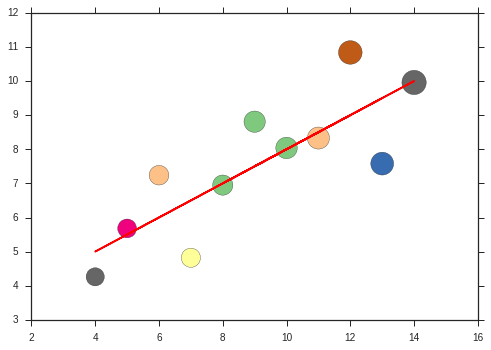

In [81]:
plt.scatter(x, y, s=area1, marker='o', c=c, cmap=cmap1)
plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cmap2)
plt.plot(x, b + m * x, '-', c='red')
sns.set_style("ticks")

### Generate a stacked scatter plot of the Anscombe's quartert

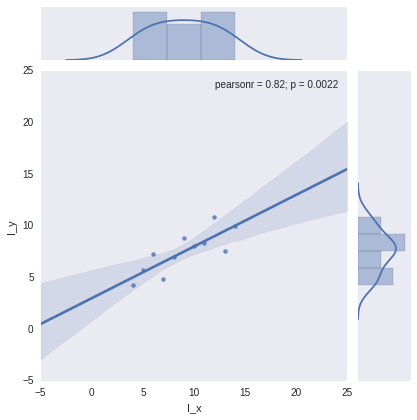

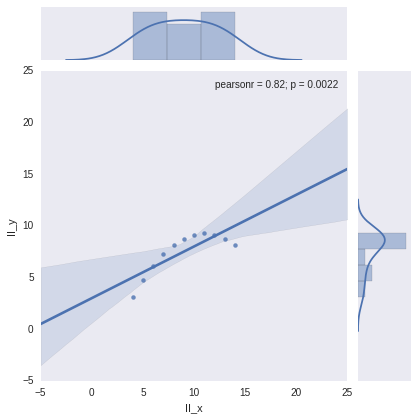

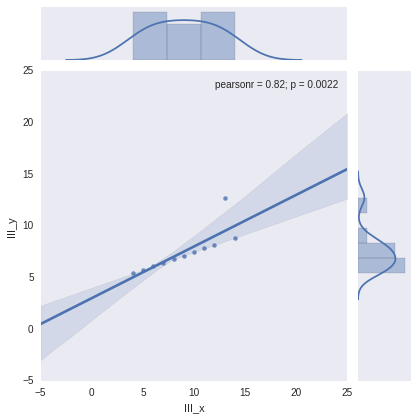

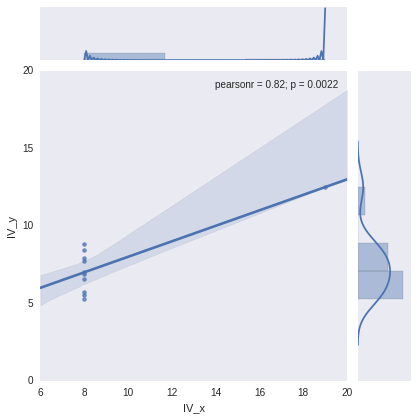

In [82]:
with sns.axes_style('dark'):
    sns.jointplot("I_x", "I_y", aq, kind='reg');
    sns.jointplot("II_x", "II_y", aq, kind='reg');
    sns.jointplot("III_x", "III_y", aq, kind='reg');
    sns.jointplot("IV_x", "IV_y", aq, kind='reg');

### Conclusion

Anscombe's quartet examples above show the importance of visulalization of a given dataset as an important step in exploratory data analysis (EDA). Anscombe's quartet, though only a small dataset, offers a salutary lesson. The summary statistics for the x and y values across each group may be the same, and a quick look at the data tables hard to picture with any degree of certainity, but when visualised as a whole, each group of data clearly tells a different story.

Working back from the ggplot commands, we see how striaghtforward it can be to generate what is quite a complex plot from a relatively simple command. However, in order to be able to "write" this chart, or set of charts, we need to get the data into the right sort of shape. And that may be quite an involved process.

In may situations, preparing the data (which may include cleaning it) may take much more time than the actual analysis or visualisation. But that is the price we pay for being able to use such powerful analysis and visualisation tools.

Anscombe concluded his paper as follows:

*Graphical output such as described above is readily available to anyone who does his own programming. I myself habitually generate such plots at an APL terminal, and have come to appreciate their importance. A skilled Fortran or PL/1 programmer, with an organized library of subroutines, can do the same (on a larger scale). Unfortunately, most persons who have recourse to a computer for statistical analysis of data are not much interested either in computer programming or in statistical method, being primarily concerned with their own proper business. Hence the common use of library programs and various statistical packages. Most of these originated in the pre-visual era. The user is not showered with graphical displays. He can get them only with trouble, cunning and a fighting spirit. It's time that was changed.*

Computational techniques have moved on somewhat since 1973, of course, and times have indeed changed. Graphical displays are everywhere, and libraries such as ggplot, Matplotlib and Seaborn, that are rooted in a sound grammatical basis mean that we are now in a position to "write" very powerful expressions that can generate statistical graphics for us, directly from a cleaned and prepared dataset, using just a few well chosen phrases. But getting the data into the right shape may stull require significant amounts of trouble, cunning and a fighting spirit. But, a visual representation of the data is the most important tool for a data-scientist to understand and decipher meaningful information from it.

## Part 06 -- Sample problem: [Marathon finishing times](https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv)

Data visualization is an important part of exploratory analysis. 



In [83]:
! wget https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/marathon-data.csv

--2018-08-26 03:34:04--  https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/07_Data-visualization/data/marathon-data.csv
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/marathon-data.csv [following]
--2018-08-26 03:34:04--  https://raw.githubusercontent.com/rahulremanan/HIMA/master/examples/Notebooks/07_Data-visualization/data/marathon-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856773 (837K) [text/plain]
Saving to: ‘marathon-data.csv.2’

marathon-data.csv.2 100%[===================

In [0]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = pd.read_csv('./marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [86]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [87]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [88]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [89]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


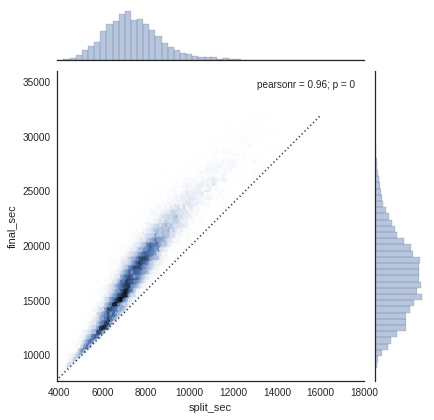

In [90]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [91]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


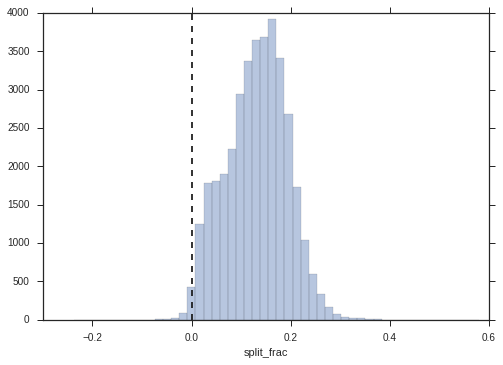

In [92]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [93]:
sum(data.split_frac < 0)

251

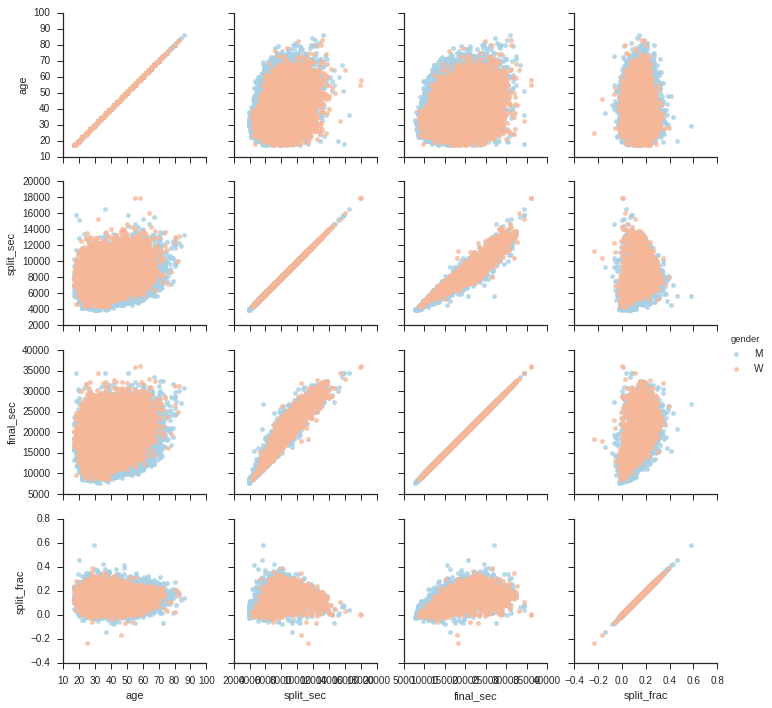

In [94]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

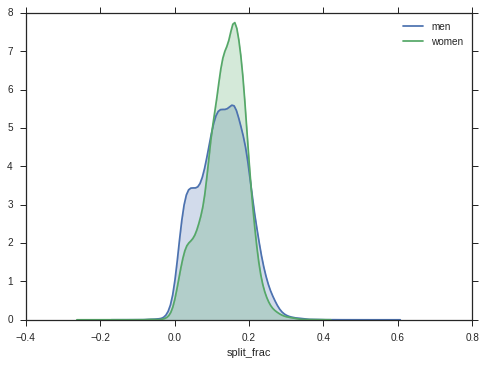

In [95]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


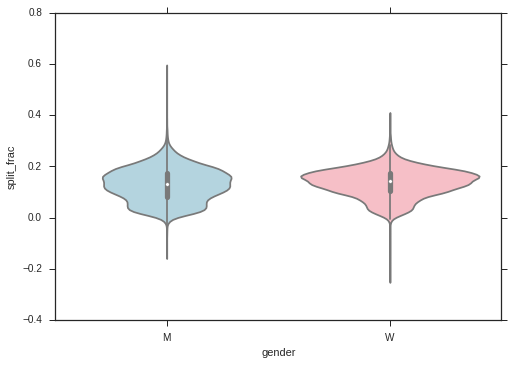

In [96]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [97]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


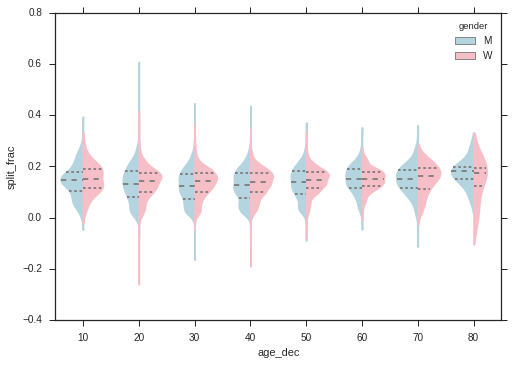

In [98]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [99]:
(data.age > 80).sum()

7

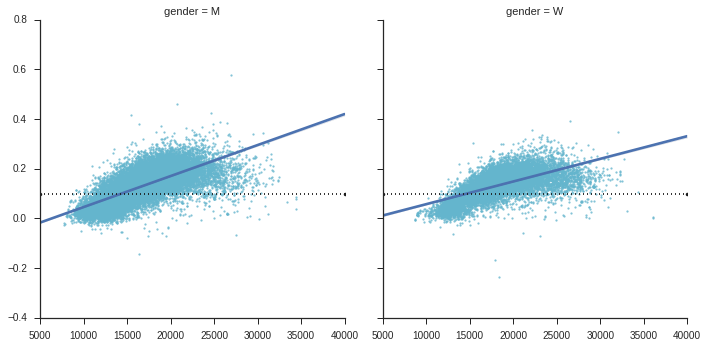

In [100]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");